In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from joblib import dump

In [2]:
#Load training and test sets
train_data = pd.read_csv('dataset/training.csv')
test_data = pd.read_csv('dataset/testing.csv')

In [3]:
train_data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
test_data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [5]:
train_data.drop(['Unnamed: 133'], axis=1, inplace=True)

In [6]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 133 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    itching                         int64 
 1    skin_rash                       int64 
 2    nodal_skin_eruptions            int64 
 3    continuous_sneezing             int64 
 4    shivering                       int64 
 5    chills                          int64 
 6    joint_pain                      int64 
 7    stomach_pain                    int64 
 8    acidity                         int64 
 9    ulcers_on_tongue                int64 
 10   muscle_wasting                  int64 
 11   vomiting                        int64 
 12   burning_micturition             int64 
 13   spotting_ urination             int64 
 14   fatigue                         int64 
 15   weight_gain                     int64 
 16   anxiety                         int64 
 17   cold_hands_and_feets           

In [7]:
test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 133 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    itching                         int64 
 1    skin_rash                       int64 
 2    nodal_skin_eruptions            int64 
 3    continuous_sneezing             int64 
 4    shivering                       int64 
 5    chills                          int64 
 6    joint_pain                      int64 
 7    stomach_pain                    int64 
 8    acidity                         int64 
 9    ulcers_on_tongue                int64 
 10   muscle_wasting                  int64 
 11   vomiting                        int64 
 12   burning_micturition             int64 
 13   spotting_ urination             int64 
 14   fatigue                         int64 
 15   weight_gain                     int64 
 16   anxiety                         int64 
 17   cold_hands_and_feets            int

In [8]:
#Get prognosis values
train_data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [9]:
#Since we are only focussing on a small set of prognoses, we create a subset of the original dataset containing only 
#the selected classes 
values = ['Common Cold', 'Malaria', 'Pneumonia']
sample_train_data = train_data.loc[train_data['prognosis'].isin(values)]
sample_test_data = test_data.loc[test_data['prognosis'].isin(values)]

In [10]:
sample_train_data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
150,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
151,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
152,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
154,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
155,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
156,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
157,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
158,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
159,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria


In [11]:
sample_test_data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
15,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
26,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Common Cold
27,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia


In [12]:
#Several columns have no part to play in the prediction of the aforementioned classes. We find this out by looking at 
#the mean values in the dataset. Features that have a mean value of 0 are never present when diagnosing 
#with one of the selected diseases.
sample_train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,360.0,360.0,360.0,360.000000,360.0,360.000000,360.0,360.0,360.0,360.0,...,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0
mean,0.0,0.0,0.0,0.316667,0.0,0.950000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.465824,0.0,0.218248,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
sample_test_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
mean,0.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.577350,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#We remove all columns which have a mean value of 0.
columns_to_drop = []
cols = sample_train_data.columns[: len(sample_train_data.columns) - 1]
for col in cols:
    if sample_train_data[col].mean() != 0.0:
        print(col)
    else:
        columns_to_drop.append(col)
sample_train_data.drop(columns_to_drop, axis = 1, inplace = True)

continuous_sneezing
chills
vomiting
fatigue
cough
high_fever
breathlessness
sweating
headache
nausea
diarrhoea
swelled_lymph_nodes
malaise
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
fast_heart_rate
loss_of_smell
muscle_pain
rusty_sputum


/Users/shreyasri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
columns_to_drop = []
cols = sample_test_data.columns[: len(sample_test_data.columns) - 1]
for col in cols:
    if sample_test_data[col].mean() != 0.0:
        print(col)
    else:
        columns_to_drop.append(col)
sample_test_data.drop(columns_to_drop, axis = 1, inplace = True)

continuous_sneezing
chills
vomiting
fatigue
cough
high_fever
breathlessness
sweating
headache
nausea
diarrhoea
swelled_lymph_nodes
malaise
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
fast_heart_rate
loss_of_smell
muscle_pain
rusty_sputum


In [16]:
sample_train_data.describe()

,continuous_sneezing,chills,vomiting,fatigue,cough,high_fever,breathlessness,sweating,headache,nausea,...,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,fast_heart_rate,loss_of_smell,muscle_pain,rusty_sputum
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.316667,0.950000,0.316667,0.633333,0.633333,0.950000,0.316667,0.633333,0.633333,0.316667,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333
std,0.465824,0.218248,0.465824,0.482565,0.482565,0.218248,0.465824,0.482565,0.482565,0.465824,...,0.472061,0.472061,0.472061,0.472061,0.472061,0.472061,0.472061,0.472061,0.472061,0.472061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
sample_test_data.describe()

,continuous_sneezing,chills,vomiting,fatigue,cough,high_fever,breathlessness,sweating,headache,nausea,...,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,fast_heart_rate,loss_of_smell,muscle_pain,rusty_sputum
count,3.000000,3.0,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.333333,1.0,0.333333,0.666667,0.666667,1.0,0.333333,0.666667,0.666667,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333
std,0.577350,0.0,0.577350,0.577350,0.577350,0.0,0.577350,0.577350,0.577350,0.577350,...,0.577350,0.577350,0.577350,0.577350,0.577350,0.577350,0.577350,0.577350,0.577350,0.577350
min,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.500000,0.500000,1.0,0.000000,0.500000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000
50%,0.000000,1.0,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.500000,1.0,0.500000,1.000000,1.000000,1.0,0.500000,1.000000,1.000000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1.000000,0.500000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Shuffling the train and test data
sample_train_data = sample_train_data.sample(frac=1)
sample_test_data = sample_test_data.sample(frac=1)

In [19]:
X_train = sample_train_data.iloc[:, :-1]
y_train = sample_train_data.iloc[:, -1]

In [20]:
X_train

,continuous_sneezing,chills,vomiting,fatigue,cough,high_fever,breathlessness,sweating,headache,nausea,...,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,fast_heart_rate,loss_of_smell,muscle_pain,rusty_sputum
1498,1,1,0,1,1,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,0
4455,0,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1
2201,0,1,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2487,0,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1
2312,0,1,0,1,1,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,1,1,0,1,1,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,0
4659,1,1,0,1,1,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,0
675,1,1,0,1,0,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,0
562,0,1,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [21]:
y_train

1498    Common Cold
4455      Pneumonia
2201        Malaria
2487      Pneumonia
2312    Common Cold
           ...     
2896    Common Cold
4659    Common Cold
675     Common Cold
562         Malaria
4495    Common Cold
Name: prognosis, Length: 360, dtype: object

In [22]:
X_test = sample_test_data.iloc[:, :-1]
y_test = sample_test_data.iloc[:, -1]

In [23]:
X_test

,continuous_sneezing,chills,vomiting,fatigue,cough,high_fever,breathlessness,sweating,headache,nausea,...,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,fast_heart_rate,loss_of_smell,muscle_pain,rusty_sputum
15,0,1,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
26,1,1,0,1,1,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,0
27,0,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1


In [24]:
y_test

15        Malaria
26    Common Cold
27      Pneumonia
Name: prognosis, dtype: object

In [25]:
#A random forest classifier is used to make predictions on the data.
#The classifier contains a large number of decision trees which each make an individual prediction. 
#The class with the most number of predictions is chosen as the predicted class for the entire model.
classifier = RandomForestClassifier(bootstrap=True, max_features=None, n_jobs=-1, criterion='gini',n_estimators=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=10, n_jobs=-1)

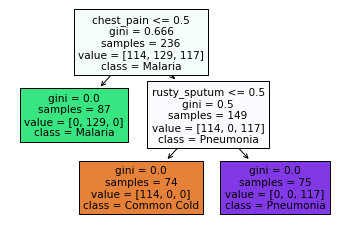

In [26]:
cn = classifier.classes_
fn = X_train.columns
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
#Matrix showing the prediction made on the test set. For this particular set, the model has 100% accuracy
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,Common Cold,Malaria,Pneumonia
Actual Result,,,
Common Cold,1,0,0
Malaria,0,1,0
Pneumonia,0,0,1


In [29]:
#Saving the classifier weights for future use
classifier.feature_names = list(X_train.columns.values)
dump(classifier, 'classifier_weights.joblib') 

['classifier_weights.joblib']